In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from scipy.signal import hilbert

# Gte the coherence of input stream.
def get_coh(st, v, sm=False, sl=20):
    m = len(st)
    n = st[0].stats.npts
    dt = st[0].stats.delta
    t = np.arange(n) * dt
    ht = np.zeros((m, n), dtype=complex)
    c = np.zeros(n)
    for i, tr in enumerate(st):
        ht[i] = hilbert(tr.data)
    pha = ht / abs(ht)
    for i in range(n):
        c[i] = abs( sum(pha[:, i]) )
    # Smooth the coherence if necessary.
    if sm:
        c = np.convolve(c/m, np.ones(sl)/sl, 'same') ** v
    else:
        c = ( c/m ) ** v
    return t, c

v = 2
st = read()
st.filter('bandpass', freqmin=2.5, freqmax=5, corners=4, zerophase=True)
d1 = st[0].data.copy()
st[0].data = d1 + np.random.randn(len(d1))*d1.max()*0.05
st[1].data = d1 + np.random.randn(len(d1))*d1.max()*0.10
st[2].data = d1 + np.random.randn(len(d1))*d1.max()*0.20

t, c = get_coh(st, v)

plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(t, st[0].data, lw=1, color='r', label='+%5 noise')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(t, st[1].data, lw=1, color='g', label='+%10 noise')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(t, st[2].data, lw=1, color='b', label='+%20 noise')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(t, c, lw=1, color='k')
plt.tight_layout()
plt.show()

In [ ]:
import librosa
import glob
from scipy import signal
import numpy as np
import os
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import h5py

def get_coh(st, v, fs, sm=False, sl=20):
    m = len(st)
    n = st[0].size
    dt = 1/fs
    t = np.arange(n) * dt
    ht = np.zeros((m, n), dtype=complex)
    c = np.zeros(n)
    for i, tr in enumerate(st):
        print(tr.data , i , n )
        ht[i] = hilbert(tr.data)
    pha = ht / abs(ht)
    for i in range(n):
        c[i] = abs( sum(pha[:, i]) )
    # Smooth the coherence if necessary.
    if sm:
        c = np.convolve(c/m, np.ones(sl)/sl, 'same') ** v
    else:
        c = ( c/m ) ** v
    return t, c

st = []
re = False
for n in range(1,4):
    test_n = str(n)
    AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    if re:
        re_fq = sample_rate//1000 # 44
        print(len(samples), re_fq)
        samples = signal.decimate(samples, 4)
        samples = signal.decimate(samples, 11)

    print(len(samples))
    st.append (samples[:sample_rate*600])
st = np.array(st)
print(st.shape ,st)
t, c = get_coh(st, v , fs= sample_rate)
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(t, st[0], lw=1, color='r', label='test 1')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(t, st[1], lw=1, color='g', label='test 2')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(t, st[2], lw=1, color='b', label='test 3')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(t, c, lw=1, color='k')
plt.tight_layout()
plt.show()
# flist = glob.glob('../../czyc/test3/*357.h5')
# flist.sort()
# print(len(flist))
# for fname in flist:
#     data = dp.read_das(fname,ch1=800,ch2=900)[::10]
#     np.append(xt , data[:])

# print(xt.shape)

    

noise record at 

test 1 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_060927.357.h5')[0][0] #3885

test 2 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_064027.357.h5')[0][0] #3981 

test 3 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_072227.357.h5')[0][0] #3885

test 4: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_180327.357.h5')[0][0] 

test 5: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_191327.357.h5')[0][0] 

/tmp/ipykernel_1049/1143142153.py:43: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/envs/py3.11/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


79492096 44
1806639
(4, 600000)


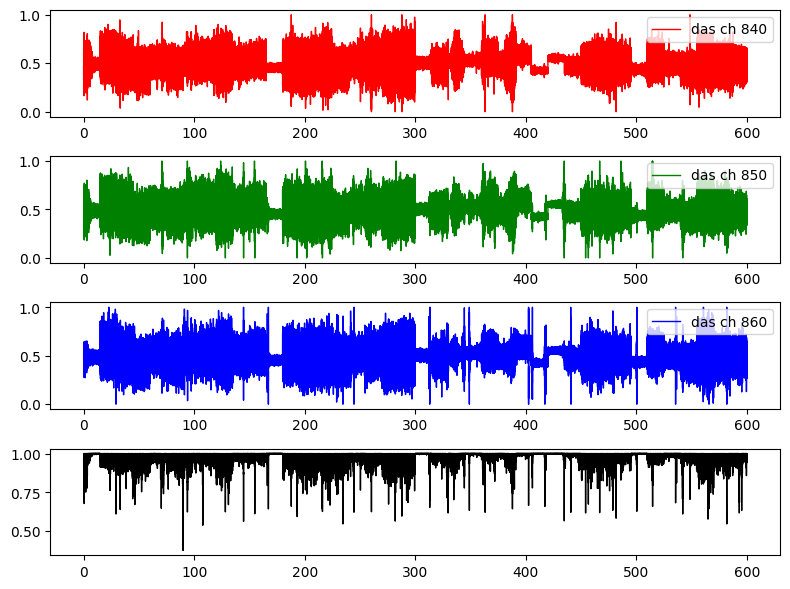

/tmp/ipykernel_1049/1143142153.py:43: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
/home/kiwicat/miniconda3/envs/py3.11/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


KeyboardInterrupt: 

In [11]:
import librosa
import glob
from scipy import signal
import numpy as np
import os
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import DasBatch as db
import h5py
from scipy.signal import hilbert

def get_coh(st, v, fs, sm=False, sl=20):
    m = len(st)
    n = st[0].size
    # print(n)
    dt = 1/fs
    t = np.arange(n) * dt
    ht = np.zeros((m, n), dtype=complex)
    c = np.zeros(n)
    for i, tr in enumerate(st):
        # print(tr.data , i , n )
        ht[i] = hilbert(tr.data)
    pha = ht / abs(ht)
    for i in range(n):
        c[i] = abs( sum(pha[:, i]) )
    # Smooth the coherence if necessary.
    if sm:
        c = np.convolve(c/m, np.ones(sl)/sl, 'same') ** v
    else:
        c = ( c/m ) ** v
    return t, c

st = []
v = 2
# flist = glob.glob('../../czyc/test3/*357.h5')
# idx = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_072227.357.h5')[0][0] 
# print(idx)
fidx = [ 0 ,3857 , 3981 ,4149 ]
for n in range(1,4):
    st = []
    test_n = str(n)
    AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    re_fq = sample_rate//1000 # 44
    print(len(samples), re_fq)
    samples = signal.decimate(samples, 4)
    samples = signal.decimate(samples, 11)


    print(len(samples))
    st.append (db.normalization(samples[:600000]))


    data_st = []
    flist = glob.glob('../../czyc/test3/*357.h5')[fidx[n] : fidx[n] + 4 *10]
    flist.sort()
    for fname in flist:
        data = dp.read_das(fname,ch1=840,ch2=873)[::10]
        # print(np.array(data).shape)
        data_st.append(db.normalization(data))
        # data_st.append(data)


    data_st = np.concatenate(data_st , axis= 1)
    # st = np.append(st , data_st , axis=0)
    st = data_st
    print(st.shape)
    t, c = get_coh(st, v , fs= 1000)
    plt.figure(figsize=(8, 6))
    plt.subplot(411)
    plt.plot(t, st[0], lw=1, color='r', label='das ch 840')
    plt.legend(loc='upper right')
    plt.subplot(412)
    plt.plot(t, st[1], lw=1, color='g', label='das ch 850')
    plt.legend(loc='upper right')
    plt.subplot(413)
    plt.plot(t, st[2], lw=1, color='b', label='das ch 860')
    plt.legend(loc='upper right')
    plt.subplot(414)
    plt.plot(t, c, lw=1, color='k')
    plt.tight_layout()
    plt.show()


    

In [ ]:
def tf_PWS(stream, v, f1, f2):
    dt = stream[0].stats.delta
    b = stream[0].stats.sac.b
    t = np.arange(stream[0].stats.npts) * dt + b
    df = 1 / (stream[0].stats.sac.e-b)
    fn1 = int(f1/df); fn2 = int(f2/df)
    for i, tr in enumerate(stream):
        d = tr.data
        s = st.st(d, fn1, fn2)
        if i < 1:
            f = np.linspace(f1, f2, len(s[:, 0]))
            T, F = np.meshgrid(t, f)
            c = np.zeros_like(s)
        ph = s / abs(s) * np.exp(2j*np.pi*F*T)
        c += ph
    c /= len(stream)
    stc = stream.copy()
    stc.stack()
    ds = st.st(stc[0].data, fn1, fn2)
    pws = st.ist(ds*abs(c)**v, fn1, fn2)
    tr.data = pws
    return tr


v = 2
st = read()
st.filter('bandpass', freqmin=2.5, freqmax=5, corners=4, zerophase=True)
d1 = st[0].data.copy()
st[0].data = d1 + np.random.randn(len(d1))*d1.max()*0.05
st[1].data = d1 + np.random.randn(len(d1))*d1.max()*0.10
st[2].data = d1 + np.random.randn(len(d1))*d1.max()*0.20

t, c = tf_PWS(st, v)

plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(t, st[0].data, lw=1, color='r', label='+%5 noise')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(t, st[1].data, lw=1, color='g', label='+%10 noise')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(t, st[2].data, lw=1, color='b', label='+%20 noise')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(t, c, lw=1, color='k')
plt.tight_layout()
plt.show()